# Posterior Approximation for a Gaussian model

Posterior distribution of a Gaussian model:
$$P(\theta | y) \propto P(\theta_1, \theta_2 | y) p(\theta_1,\theta_2)= \frac{exp(\frac{\theta_1}{\theta_2}t_1(y) - \frac{t_2(y)}{2\theta_2}}{C(\theta_1, \theta_2)} p(\theta_1,\theta_2)$$
Where:
the $y$ is the observation

$t(y)=[t_1(y), t_2(y)]$ the vector of sufficient statistics: $t_1(y) = \sum_i^m y_i$ and $t_2(y) = \sum_i^m y_i^2$

$\theta = [\theta_1, \theta_2]$ the parameters: $\theta_1$ is **the mean** $\theta_2$ **the variance** ($var = \sigma^2$)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json

In [134]:
def extract_from_file(path):
    with open(path, 'r') as input_file:
        data = json.load(input_file)
    mean = [d[0] for d in data]
    var = [d[1] for d in data]
    data_frame = pd.DataFrame({'mean': mean, 'var': var})
    return data_frame

def sample(df, by):
    data_frame = pd.DataFrame({'mean': [mean[1] for mean in data2['mean'].items() if mean[0] % 10 == 0], 
                               'var': [var[1] for var in data2['var'].items() if var[0] % 10 == 0]})
    return data_frame

def summary(data):
    print("========== Q1 ==========")
    print("Q1 for theta_mean parameter {}".format(np.percentile(data['mean'], 25)))
    print("Q1 for theta_var parameter {}".format(np.percentile(data['var'], 25)))
    print("========== Median ==========")
    print("Median for theta_mean parameter {}".format(np.percentile(data['mean'], 50)))
    print("Median for theta_var parameter {}".format(np.percentile(data['var'], 50)))
    print("========== Mean ==========")
    print("Mean for theta_mean parameter {}".format(np.mean(data['mean'])))
    print("Mean for theta_var parameter {}".format(np.mean(data['var'])))
    print("========== Q3 ==========")
    print("Q3 for theta_mean parameter {}".format(np.percentile(data['mean'], 75)))
    print("Q3 for theta_var parameter {}".format(np.percentile(data['var'], 75)))

def comparaison(data_mh, data_abc):
    fig, axs = plt.subplots(2, 2, figsize=(14,14))

    df_mean = pd.DataFrame({"mean MH": data_mh["mean"], "mean ABC" : data_abc["mean"]})
    axs[0,0].set_title(label="Normal distribution - mean parameter")
    sns.boxplot(data=df_mean, ax=axs[0,0])
    
    axs[0,1].scatter(data_mh["mean"].sort_values(), data_abc["mean"].sort_values())
    axs[0,1].set_title(label="Normal distribution - mean parameter : QQ plot")
    
    df_var = pd.DataFrame({"var MH": data_mh["var"], "var ABC" : data_abc["var"]})
    sns.boxplot(data=df_var, ax=axs[1,0])
    axs[1,0].set_title(label="Normal distribution - variance parameter")
    
    axs[1,1].scatter(data_mh["var"].sort_values(), data_abc["var"].sort_values())
    axs[1,1].set_title(label="Normal distribution - variance parameter : QQ plot")

    plt.show()


# First results

### MH Result

* sample size : $size=1000$
* $theta_0 = [10,10]$
* $y \sim N(\mu = 2, \sigma = 3)$
* $\Delta=[0.05, 0.025]$
* Number of samples: $n=1000$
* $n_{algo} = 100$

In [30]:
FILE_NAME_0 = 'assets/exp0.json'

/Users/quentin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


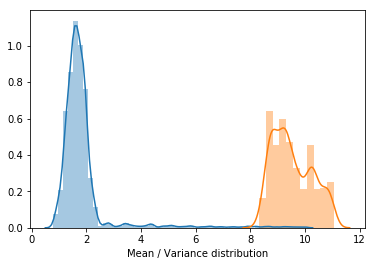

In [31]:
data0 = extract_from_file(FILE_NAME_0)
sns.distplot(data0['mean'])
sns.distplot(data0['var'], axlabel="Mean / Variance distribution")

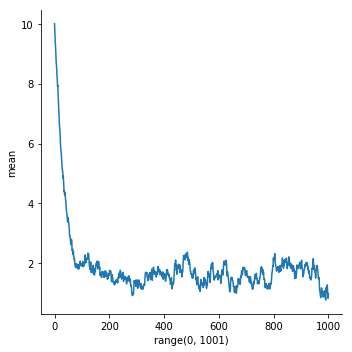

In [32]:
sns.relplot(x=range(len(data0['mean'])),y='mean', data=data0, kind='line', legend='brief')

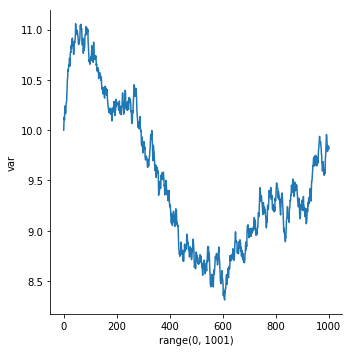

In [33]:
sns.relplot(x=range(len(data0['var'])),y='var', data=data0, kind='line', legend='brief')

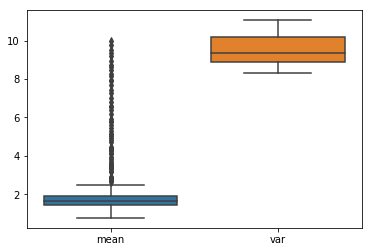

In [59]:
sns.boxplot(data=data0)

In [53]:
summary(data0)

========== Q1 ==========
Q1 for theta_mean parameter 1.4436012236066158
Q1 for theta_var parameter 8.907489274123305
========== Median ==========
Median for theta_mean parameter 1.6531668882167139
Median for theta_var parameter 9.374880862118331
========== Mean ==========
Mean for theta_mean parameter 1.8718343666186308
Mean for theta_var parameter 9.53230389879015
========== Q3 ==========
Q3 for theta_mean parameter 1.9132364221625984
Q3 for theta_var parameter 10.18807057459393


### ABC result
* sample size : $size=1000$
* $theta_0 = [10,10]$
* $y \sim N(\mu = 2, \sigma = 3)$
* $\Delta=[0.05, 0.025]$
* Number of samples: $n=1000$
* Shadow chain length: $n_{shadow} = 100$

In [44]:
FILE_NAME_1 = 'assets/exp1.json'

/Users/quentin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


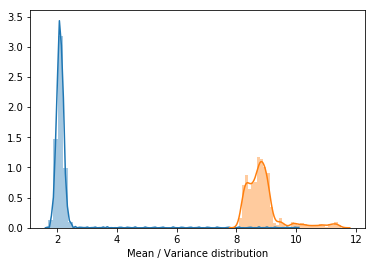

In [45]:
data1 = extract_from_file(FILE_NAME_1)
sns.distplot(data1['mean'])
sns.distplot(data1['var'], axlabel="Mean / Variance distribution")

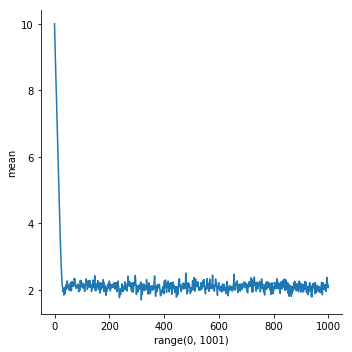

In [46]:
sns.relplot(x=range(len(data1['mean'])),y='mean', data=data1, kind='line', legend='brief')

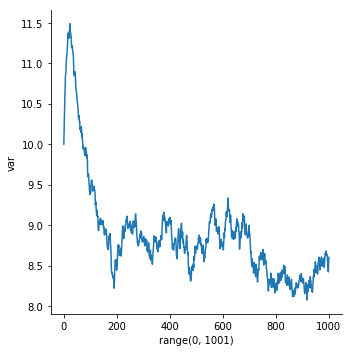

In [47]:
sns.relplot(x=range(len(data1['var'])),y='var', data=data1, kind='line', legend='brief')

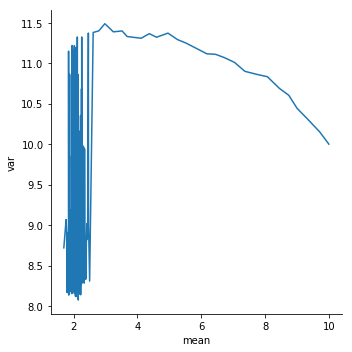

In [48]:
sns.relplot(x='mean',y='var', data=data1, kind='line', legend='brief')

========== Q1 ==========
Q1 for theta_mean parameter 2.0221391818628875
Q1 for theta_var parameter 8.494056848114326
========== Median ==========
Median for theta_mean parameter 2.096012880485134
Median for theta_var parameter 8.782496233640577
========== Mean ==========
Mean for theta_mean parameter 2.1985600116559727
Mean for theta_var parameter 8.887783716190555
========== Q3 ==========
Q3 for theta_mean parameter 2.1758222393226307
Q3 for theta_var parameter 9.012363687846678


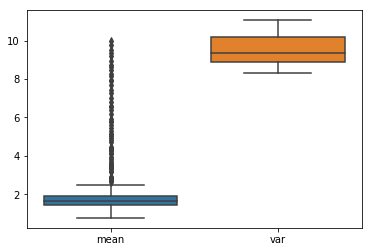

In [60]:
summary(data1)
sns.boxplot(data=data0)

## comparaison between MH and ABC

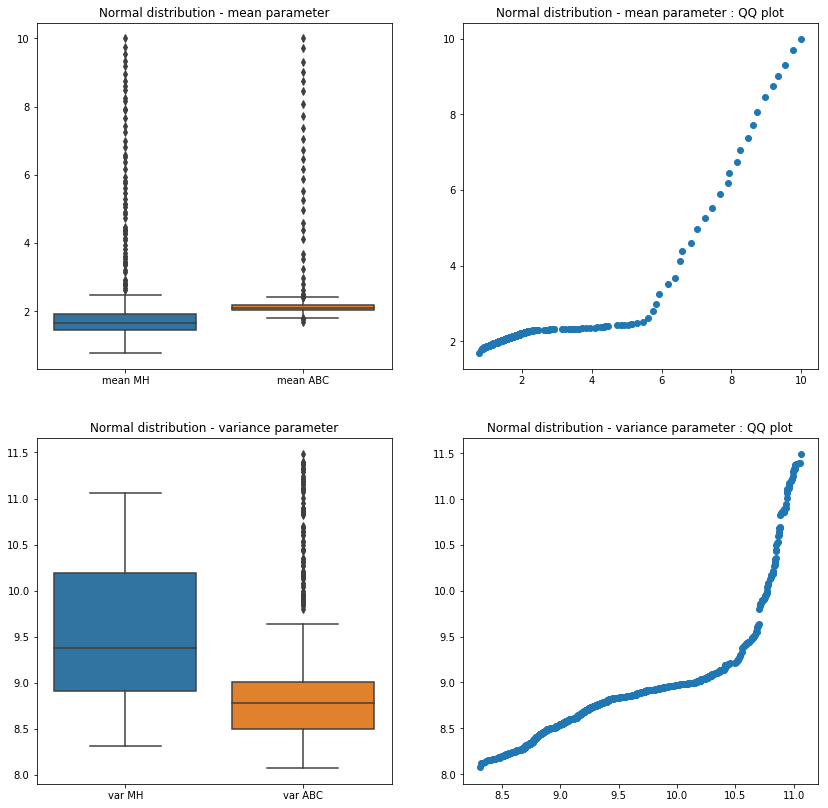

In [135]:
comparaison(data0, data1)

# Second result

### ABC result
* sample size : $size=1000$
* $theta_0 = [10,10]$
* $y \sim N(\mu = 2, \sigma = 3)$
* $\Delta=[0.05, 0.05]$
* Number of samples: $n=10 000$
* Shadow chain length: $n_{shadow} = 100$

In [8]:
FILE_NAME_2 = 'assets/exp2.json'

/Users/quentin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


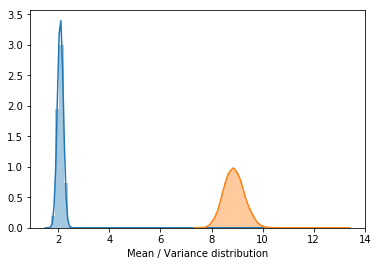

In [9]:
data2 = extract_from_file(FILE_NAME_2)
sns.distplot(data2['mean'])
sns.distplot(data2['var'], axlabel="Mean / Variance distribution")

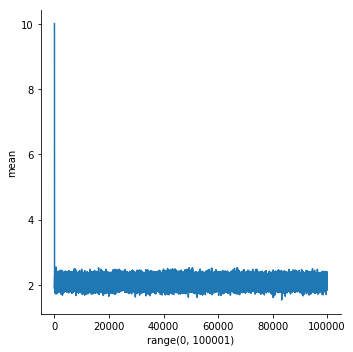

In [10]:
sns.relplot(x=range(len(data2['mean'])),y='mean', data=data2, kind='line', legend='brief')

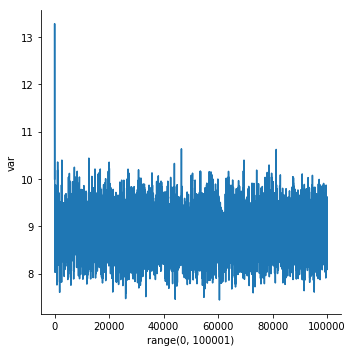

In [11]:
sns.relplot(x=range(len(data2['var'])),y='var', data=data2, kind='line', legend='brief')

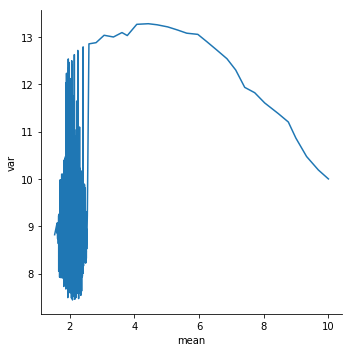

In [12]:
sns.relplot(x='mean',y='var', data=data2, kind='line', legend='brief')

In [13]:
data2_100 = sample(data2, 10)

/Users/quentin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


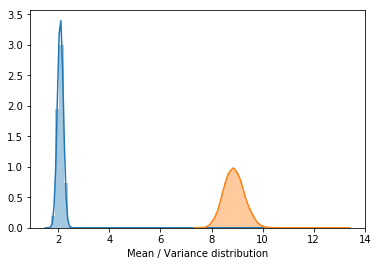

In [14]:
sns.distplot(data2['mean'])
sns.distplot(data2['var'], axlabel="Mean / Variance distribution")

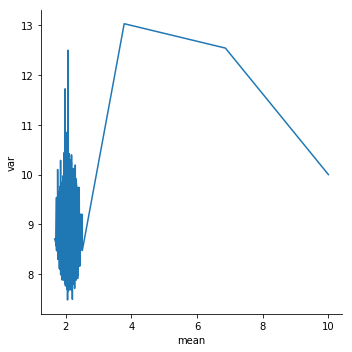

In [15]:
sns.relplot(x='mean',y='var', data=data2_100, kind='line', legend='brief')

# Third results

### ABC result
* sample size : $size=1000$
* $theta_0= [10,10]$
* $y \sim N(\mu = 2, \sigma = 3)$
* $\Delta=[0.05, 0.05]$
* Number of samples: $n=10 000$
* Shadow chain length: $n_{shadow} = 500$

In [16]:
FILE_NAME_3 = 'assets/exp3.json'

/Users/quentin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


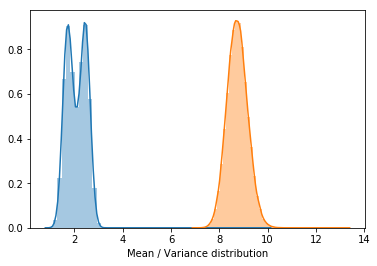

In [17]:
data3 = extract_from_file(FILE_NAME_3)
sns.distplot(data3['mean'])
sns.distplot(data3['var'], axlabel="Mean / Variance distribution")

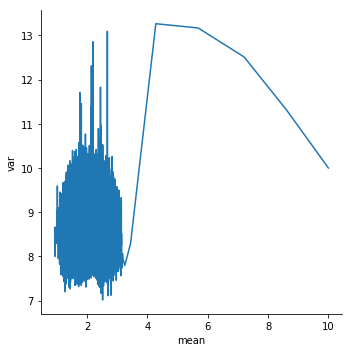

In [18]:
sns.relplot(x='mean',y='var', data=data3, kind='line', legend='brief')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a29566d68>,
 'caps': [<matplotlib.lines.Line2D at 0x1a29573668>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a29566c18>,
 'medians': [<matplotlib.lines.Line2D at 0x1a29573eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a2957b320>,
 'means': []}

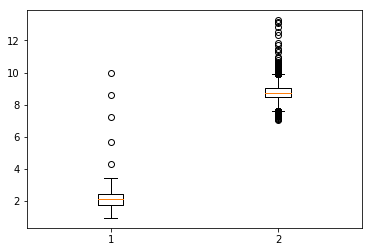

In [21]:
plt.boxplot([data3['mean'], data3['var']])

In [22]:
np.percentile(data3['mean'], 25)

1.7354853791086555

In [23]:
np.percentile(data3['mean'], 75)

2.434921511430995

In [24]:
np.percentile(data3['mean'], 50)

2.0863035409401016

In [28]:
np.mean(data3['mean'])

2.0856754781022393